# Wine Quality DataSet Prediction

**Group 8: Zoey Ma, Erin Dougall, Jack Rong**

## Introduction: 

- Having exceptional wine taste preferences has become a very revered skill over time, that few people make a career out of. Determining the 'quality' of a wine is based on human preference but these preferences are often influenced by physicochemical and sensory variables (Cortez, P., et al, 2009). We want to see if we can create a more data-driven approach to the classification of wine quality. Similar models have been created and their systems ranked the wines very similarly to experts (Petropoulos, S., et al, 2017).

- Our model will answer the question, what quality ranking will a wine receive based on its pH and alcohol levels?

- The data set we will be using is the ‘Wine Quality Data Set’ found on UCI and created by researchers at the University of Minho in Portugal. The data set focuses on red Portuguese ‘Vinho Verde’ wines. It has input variables based on physicochemical tests such as acidity, pH, alcohol level, etc. which all lead to the output of a quality score from 0-10.

- Input variables (based on physicochemical tests):
1. **fixed acidity:** most acids involved with wine or fixed or nonvolatile
2. **volatile acidity:** the amount of acetic acid in wine
3. **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines
4. **residual sugar:** the amount of sugar remaining after fermentation stops
5. **chlorides:** the amount of salt in the wine
6. **free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
7. **total sulfur dioxide:** amount of free and bound forms of S02
8. **density:** the density of water is close to that of water depending on the percent alcohol and sugar content
9. **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
10. **sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels
11. **alcohol:** the percent alcohol content of the wine
- Output variable (based on sensory data):
12. **quality:** output variable (based on sensory data, score between 0 and 10). To make things clearer for classification, we will split the quality into 3 labels; poor (quality score from 0-4), normal (quality score from 5-6), and excellent (quality score from 7-10). 



## Preliminary exploratory data analysis:

In [13]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
wine_quality_data = pd.read_csv("winequality-red.csv",sep=";")#.columns.str.replace(' ', '_')
wine_quality_data.columns = wine_quality_data.columns.str.replace(' ','_',regex=True)
wine_quality_data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [15]:
wine_quality_data.isnull().sum()

# No null values present in data frame.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
variables = wine_quality_data.columns.values
print(variables)

['fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


In [17]:
#Here we can say most of wines are between 5 to 6 range which is average. 3 is the lowest qulity and 8 is the highest.

wine_quality_data['quality'].value_counts(normalize = True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

## Methods: 
- We will use a KNN classifier to predict the wine quality using the volatile acidity and citric_acid columns since they are two common factors that contribute to the wine quality. It's also the most useful features as presented in our predictor box plots below. Although the wine quality is a numeric quantity in the dataset, we will use a classifier rather than regression since the quality is actually an ordinal variable rating (integers from 0-10) so we will treat it as a class/category. We will split it into three labels, which are poor (quality from 0 - 4),normal (quality from 5 -6), and excellent (quality from 7 to 10). We will find the best k-value between 1-100 using cross-validation and grid search with the training set. After doing so, we will use the best k-value to build a model on the entire training set and use it to predict on the test set to determine our classifier's accuracy.

- As an intermediate step, we can call the best_score_ and best_accuracy methods which van give us the best accuracy during cross-validation with grid search using mean test score. This will allow us to easily determine the best k-value as well as see how the accuracy changes with different k-values.

- We will visualize our results using a confusion matrix to see when and how many times we have predicted the correct label vs. the incorrect label.


**We decided to create a correlation map to find the strength and direction of the relationship between variables. The coefficient ranges from -1 to 1, with a value of 0 indicating no correlation, a positive value indicating a positive correlation, and a negative value indicating a negative correlation.**

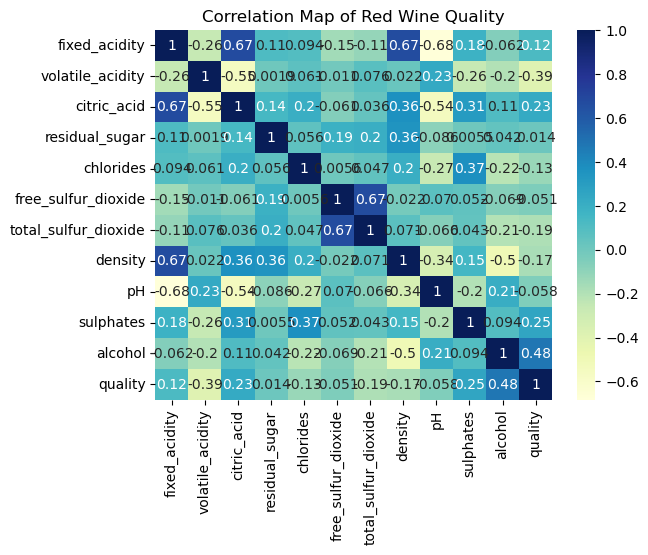

In [18]:
# Correlation map 
corr_matrix = wine_quality_data.corr()

# Create a heatmap of the correlations
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Map of Red Wine Quality')

# Display the heatmap
plt.show()

In [19]:
# We decided to split quality into 3 labels, which are poor (quality from 0 - 4),normal (quality from 5 -6),
# and excellent (quality from 7 to 10)
wine_quality_data = pd.read_csv("winequality-red.csv",sep=";")
wine_quality_data.columns = wine_quality_data.columns.str.replace(' ','_',regex=True)
bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
wine_quality_data['quality_label'] = pd.cut(wine_quality_data['quality'], bins=bins, labels=labels)
wine_quality_data.drop('quality',axis =1, inplace = True)
wine_quality_data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality_label  
0      9.4        normal  
1      9.8        normal  
2      9.8        normal  
3      9.8        normal  
4      9.4        normal

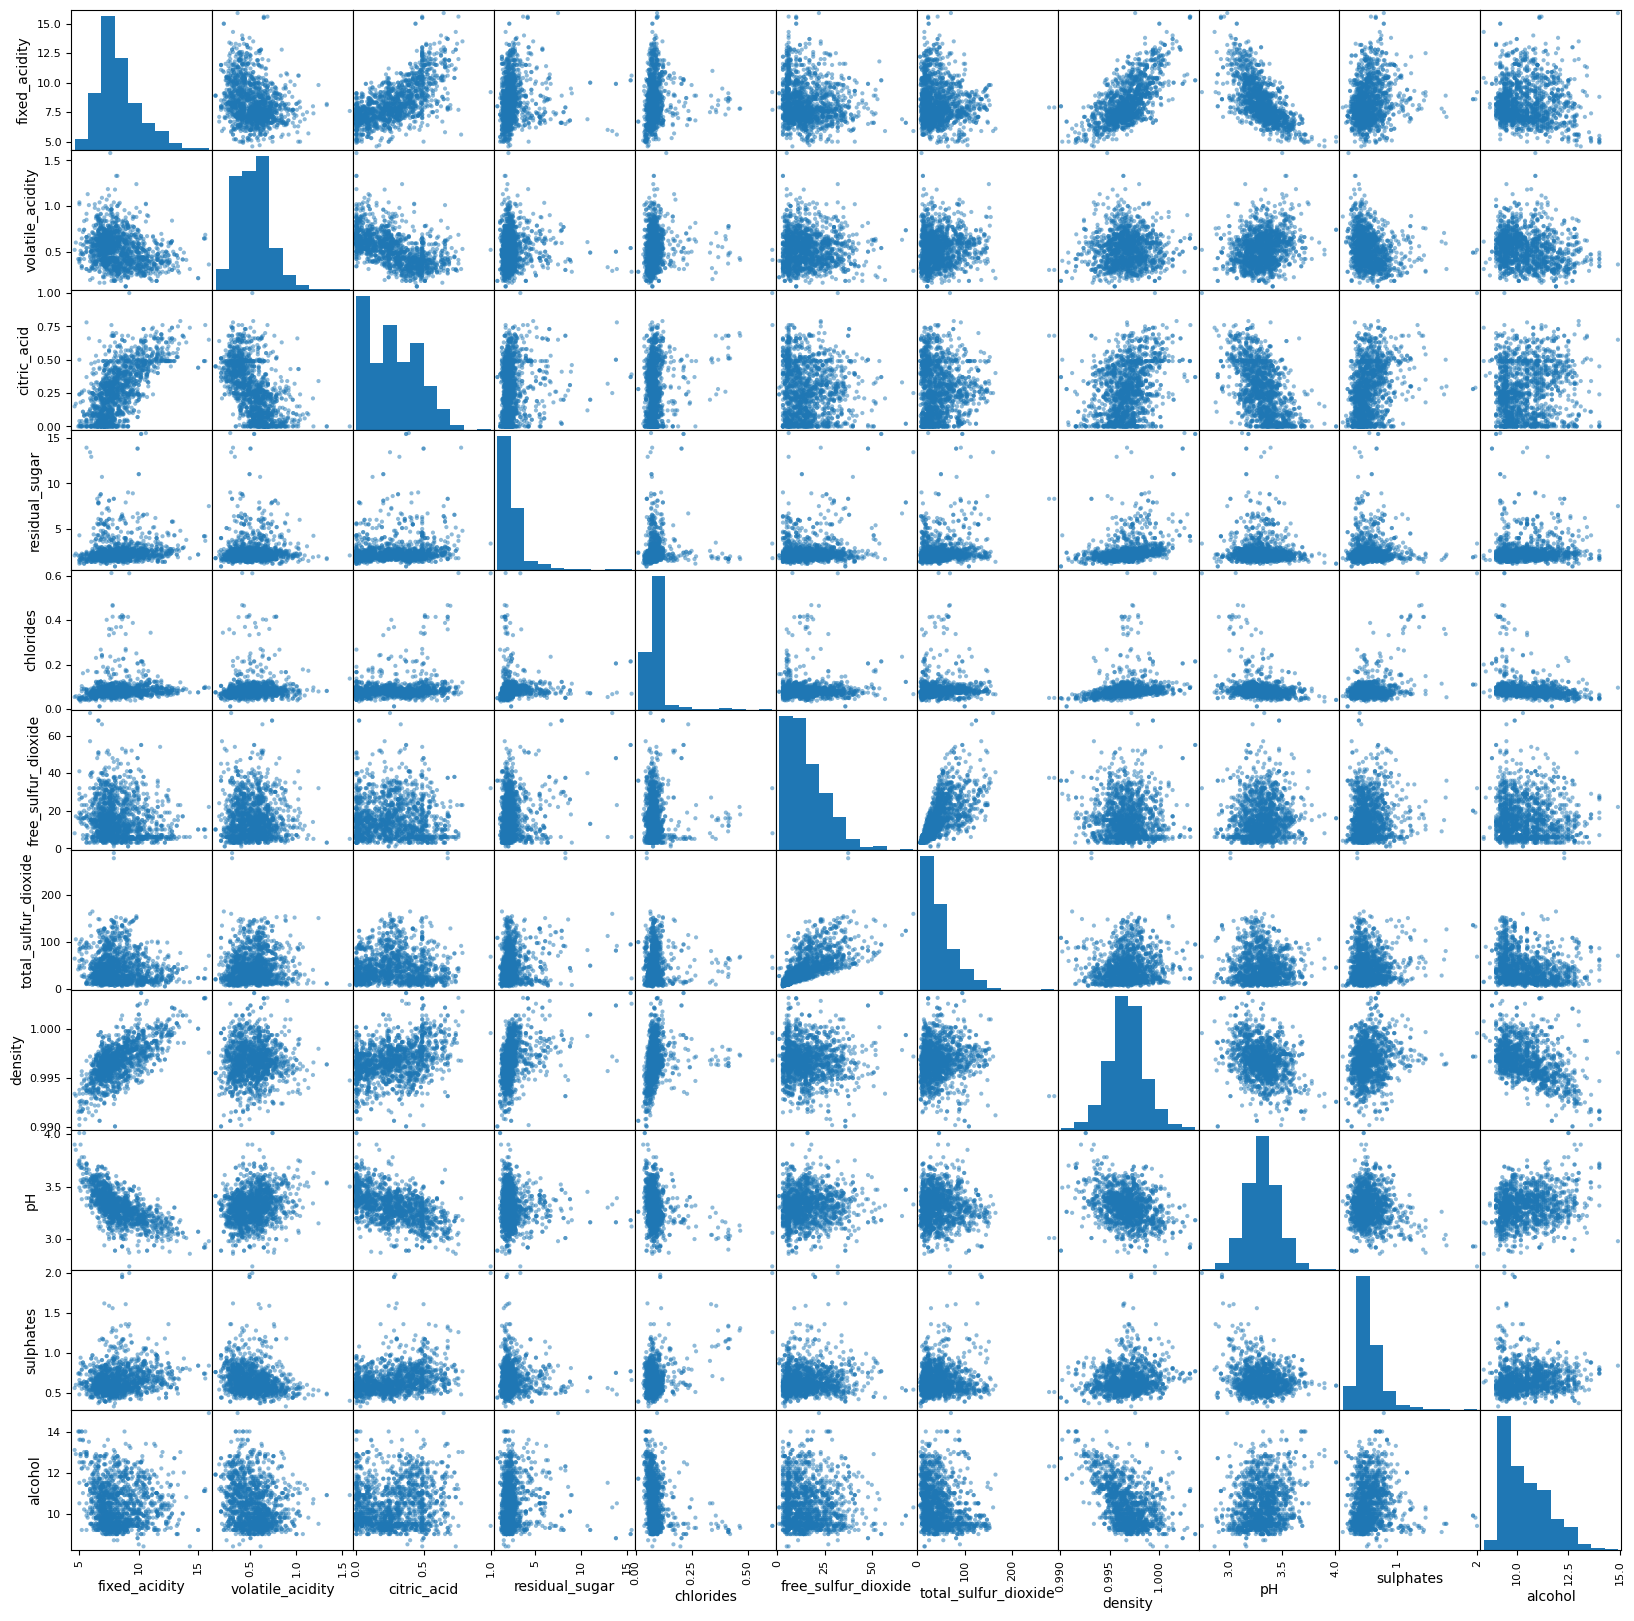

In [20]:
#Pairplot: to better determine the relationships between pairs of variables in a dataset.
#we decided to create pairlots for our red wine quality 
pd.plotting.scatter_matrix(wine_quality_data, figsize=(20, 20))

# Display the pair plot
plt.show()

**Then, we will create box plot for these two variables below to compare the distribution of them across different red wine labels.**



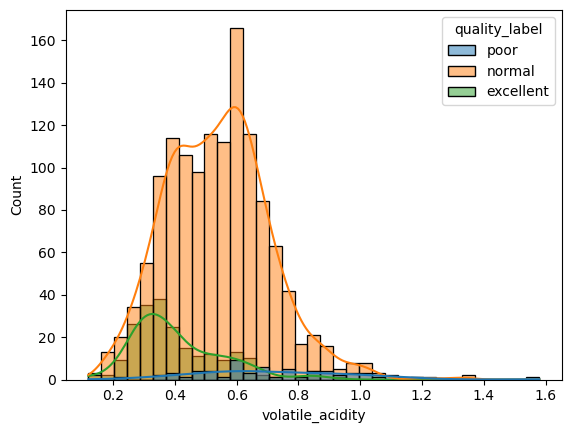

In [21]:
#Box plot for volatile acidity
sns.histplot(data=wine_quality_data,x="volatile_acidity",hue="quality_label",kde=True)
plt.show()

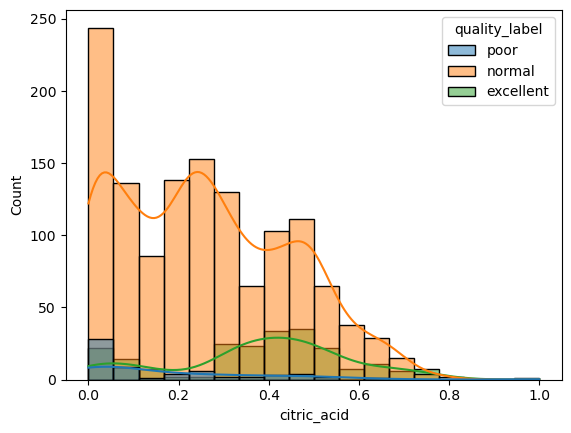

In [22]:
#Box plot for volatile acidity
sns.histplot(data=wine_quality_data,x="citric_acid",hue="quality_label",kde=True)
plt.show()

**To determine wine qulity, volatile acidity and citric acid can be our important features as the overlap of their distributions are vary less in comparison to others.**

In [100]:
#Splitting the dataset
np.random.seed(2000)
wine_train, wine_test = train_test_split(
    wine_quality_data, train_size = 0.75
)
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 900 to 950
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1199 non-null   float64 
 1   volatile_acidity      1199 non-null   float64 
 2   citric_acid           1199 non-null   float64 
 3   residual_sugar        1199 non-null   float64 
 4   chlorides             1199 non-null   float64 
 5   free_sulfur_dioxide   1199 non-null   float64 
 6   total_sulfur_dioxide  1199 non-null   float64 
 7   density               1199 non-null   float64 
 8   pH                    1199 non-null   float64 
 9   sulphates             1199 non-null   float64 
 10  alcohol               1199 non-null   float64 
 11  quality_label         1199 non-null   category
dtypes: category(1), float64(11)
memory usage: 113.7 KB


In [101]:
wine_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1312 to 1520
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         400 non-null    float64 
 1   volatile_acidity      400 non-null    float64 
 2   citric_acid           400 non-null    float64 
 3   residual_sugar        400 non-null    float64 
 4   chlorides             400 non-null    float64 
 5   free_sulfur_dioxide   400 non-null    float64 
 6   total_sulfur_dioxide  400 non-null    float64 
 7   density               400 non-null    float64 
 8   pH                    400 non-null    float64 
 9   sulphates             400 non-null    float64 
 10  alcohol               400 non-null    float64 
 11  quality_label         400 non-null    category
dtypes: category(1), float64(11)
memory usage: 38.0 KB


In [102]:
#Calculate the counts of each quality appear in the training dataset
wine_train['quality_label'].value_counts(normalize = True)

normal       0.822352
excellent    0.138449
poor         0.039199
Name: quality_label, dtype: float64

In [103]:
# This shows that there is 0 rows that has missing data in the training dataset 
wine_train.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_label           0
dtype: int64

In [104]:
#This table shows the mean value for each predictor variable at each wine wuality level 
mean_sum_table = pd.DataFrame()
wine_vars = ['fixed_acidity','volatile_acidity','citric_acid',
               'residual_sugar','chlorides','free_sulfur_dioxide',
               'total_sulfur_dioxide','density','pH','sulphates','alcohol']
for var in wine_vars: 
    mean_sum_table['mean_',var] = wine_train.groupby(wine_train['quality_label'])[var].mean()
    
#remove the '(' and ')' in colomn names
new_names = {col: var for col, var in zip(mean_sum_table.columns, wine_vars)}
mean_sum_table = mean_sum_table.rename(columns=new_names)
mean_sum_table


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality_label                                                                 
poor                8.117021          0.739681     0.166809        2.496809   
normal              8.230832          0.542870     0.252515        2.510446   
excellent           8.836747          0.409428     0.366325        2.685843   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality_label                                                                   
poor            0.092298            11.425532             31.106383  0.996815   
normal          0.088046            16.519270             49.423428  0.996857   
excellent       0.076078            13.876506             34.674699  0.996093   

                     pH  sulphates    alcohol  
quality_label                                  
poor           3.372979   0.581064  10.129787  
normal         3.314452   0.645801  10.254648  
excellent      3.298313   0.750542  11.452510

**Training Data Visualization**

In [105]:
# To see how data is distributed for every column: we create distribution plots for each of the predictor varibles 

wine_vars = ['fixed_acidity','volatile_acidity','citric_acid',
               'residual_sugar','chlorides','free_sulfur_dioxide',
               'total_sulfur_dioxide','density','pH','sulphates','alcohol']




var_plots = [] 
for var in wine_vars: 
    var_plot = (
    alt.Chart(wine_train)
    .mark_bar()
    .encode( x= alt.X(var, title = (var.replace('_', ' '), "value")),
            y=alt.Y("count()", title = ("density")),
            opacity=alt.value(0.5),
            color = alt.value('purple')
           )
    
)
    var_plots.append(var_plot) 

for var_plot in var_plots:
    var_plot.display() 

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

## Data Analysis: 

In [106]:
wine_concav = (
    alt.Chart(wine_quality_data)
    .mark_circle()
    .encode(
        x="volatile_acidity",
        y="citric_acid",
        color= alt.Color("quality_label"))
)
wine_concav

alt.Chart(...)

In [107]:

#Preprocess the data:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
 #Preprocess the data:
wine_preprocessor = make_column_transformer (
    (StandardScaler(), ["volatile_acidity","citric_acid"]),
)

#train the classifier
knn = KNeighborsClassifier(n_neighbors = 2)

X = wine_train.loc[:,["volatile_acidity","citric_acid"]]
y = wine_train["quality_label"]
X_train_sc= X.to_numpy()
y_train_sc= y.to_numpy()

X_test = wine_test.loc[:,["volatile_acidity","citric_acid"]]
y_test = wine_test["quality_label"]
X_test_sc= X_test.to_numpy()
y_test_sc= y_test.to_numpy()


knn_fit = make_pipeline(wine_preprocessor,knn).fit(X,y)

wine_test_predictions = wine_test.assign(
    predicted = knn_fit.predict(wine_test.loc[:,["volatile_acidity","citric_acid"]])
)

#wine_test_predictions
wine_test_predictions[['quality_label','predicted']]

correct_preds = wine_test_predictions[
    wine_test_predictions['quality_label'] == wine_test_predictions
]
correct_preds.shape[0] / wine_test_predictions.shape[0]

knn_fit


/tmp/ipykernel_101/3222559729.py:36: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  wine_test_predictions['quality_label'] == wine_test_predictions


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['volatile_acidity',
                                                   'citric_acid'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [108]:
wine_acc1 = knn_fit.score(
    wine_test.loc[:,["volatile_acidity","citric_acid"]],
    wine_test['quality_label']
)
wine_acc1

0.7325

**The accuracy with K=2 is 73.5%.** 

In [109]:
# Parameter value selection
knn = KNeighborsClassifier() 
wine_tune_pipe = make_pipeline(wine_preprocessor,knn)
parameter_grid = {
    "kneighborsclassifier__n_neighbors":range(1,100,2),
}

wine_tune_grid = GridSearchCV(
    estimator = wine_tune_pipe,
    param_grid = parameter_grid,
    cv=5,
    n_jobs=-1
)


gs_results = wine_tune_grid.fit(X, y)


accuracies_grid = pd.DataFrame(
    wine_tune_grid
    .fit(wine_train.loc[:,["volatile_acidity","citric_acid"]],
        wine_train["quality_label"]
        ).cv_results_)

accuracies_grid = accuracies_grid[["param_kneighborsclassifier__n_neighbors", "mean_test_score", "std_test_score"]
              ].assign(
                  sem_test_score = accuracies_grid["std_test_score"] / 5**(1/2)
              ).rename(
                  columns = {"param_kneighborsclassifier__n_neighbors" : "n_neighbors"}
              ).drop(
                  columns = ["std_test_score"]
              )
accuracies_grid.head()




n_neighbors  mean_test_score  sem_test_score
0           1         0.770669        0.015067
1           3         0.779006        0.008950
2           5         0.796503        0.002062
3           7         0.804013        0.004782
4           9         0.806499        0.002619

In [110]:
print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.823186889818689
Best Parametrs:  {'kneighborsclassifier__n_neighbors': 65}


**From above, we can say that our best model is with K = 65. To observe its accuracy, we can re-perform the fitting to output the new accuracy.**

In [112]:
knn_65 = KNeighborsClassifier(n_neighbors = 65)
knn_fit_65 = make_pipeline(wine_preprocessor,knn_65).fit(X,y)
wine_acc = knn_fit_65.score(
    wine_test.loc[:,["volatile_acidity","citric_acid"]],
    wine_test['quality_label']
)
wine_acc

0.8325

**The accuracy using K = 65 is 83.25%, and we can see that it was improved by 9.75% compared to using K = 2.**

In [113]:
#Confusion matrix for KNN 
print(pd.DataFrame(y_test)['quality_label'].value_counts())

normal       333
excellent     51
poor          16
Name: quality_label, dtype: int64


In [114]:
pd.crosstab(
    wine_test_predictions['quality_label'],
    wine_test_predictions['predicted']
)

predicted      excellent  normal  poor
quality_label                         
poor                   1      15     0
normal                64     267     2
excellent             26      25     0

## Discussion and Significance:
- Our strategy resulted in a model that can predict the quality ranking of a Portuguese “Vinho Verde” to 83.25% accuracy through a K-NN approach using a K-value = 65. This is within the range of what we were hoping and expecting  to find. We were successfully able to figure out which input variables have the highest impact on the quality ranking using a correlation map and we utilized these variables to give us the most accurate outcome. We then used a technical approach with cross-validation to ensure we use a K value with the highest accuracy. This means our objective to predict the quality as similarly to wine experts as possible has been met.

- As seen with the confusion matrix, we do a pretty good job at accurately predicting normal qualities. However, we can also see that we don’t do as good of a job at predicting poor and excellent qualities. We can see with the matrix that we simply do not have as many data points in our data sets for poor and excellent qualities. This means that during training, it is likely that it didn’t have many of those classifications to train on which is why it isn’t able to predict them as accurately. If we had more data points for these qualities, we could make our model better. However, our current model doesn’t do as good of a job at predicting poor and excellent qualities.


- Using a data mining approach to classifying wine qualities could have a huge significance to the wine industry. When it is time for new wines to be certified, many countries require by law for the sensory analysis to be done by human testers. However, all testers have their own unique experience and thus their analysis is inherently biased. Our approach to classification remains objective. Some researchers suggest these data-driven approaches could aid in the efficiency of wine evaluation; for example, an expert has to repeat their evaluation only if there is a significant difference between their classification and the model’s (Cortez, P., et al, 2009). 
- This model could also be improved by using other distinguishing variables of the wine. We used the most impactful from the data set, but another huge factor in wine quality ranking is its aroma composition (Ferreira, V., et al, 2009). Including a wine’s aroma composition and odorants present in the wine could lead to a more accurate model.
- Looking to the future, could classification models like ours aid new winemakers in legitimizing their products without the need for expensive evaluations? Could it help remove some of the bias that lives within the fine wine industry? Of course, our model does not have a 100% accuracy rate, but using it to aid in the process of wine quality evaluations could result in a more efficient process, a more affordable process, and a process that does not rely solely on biased human opinion.



## Citations:

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., Reis, J. (2009). Modelling wine preference by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553. https://doi.org/10.1016/j.dss.2009.05.016

Ferreira, V., San Juan, F., Escudero, A., Culleré, L., Fernández-Zurbano, P., Saenz-Navajas, M., Cacho, J. (2009) Modeling Quality of Premium Spanish Red Wines from Gas Chromatography-Olfactometry Data. Journal of Agricultural and Food Chemistry, 57(16), 7490-7498. https://doi.org/10.1021/jf9006483 


Petropoulos, S., Karavas, C. S., Balafoutis, A. T., Paraskevopoulos, I., Kallithraka, S., Kotseridis, Y. (2017). Fuzzy logic tool for wine quality classification. Computers and Electronics in Agriculture, 142(Part B), 552-562. https://doi.org/10.1016/j.compag.2017.11.015
